<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Mestrado/Projeto/Teste_2_Classifica%C3%A7%C3%A3o_de_Imagens_de_Embri%C3%B5es_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Utilizando transferência de aprendizado com a rede de convolução já treinada (ResNet50)

## **Importando as Libs**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Subindo o arquivo zipado com as imagens

In [2]:
!unzip -q Base.zip
!ls

Base  Base.zip	sample_data


Agora temos uma pasta 'Base' que contém 8 subpastas. Cada subpasta contem arquivos de imagem de cada categoria.

In [3]:
!ls Base

AA  AB	BA  BB	BC  CA	CB  CC


In [4]:
import os	#"AB", "BA", "BB", "BC", "CA",

# Testes com todas as categorias
num_skipped = 0
for folder_name in ("AA", "AB", "BA", "BB", "BC", "CA", "CB", "CC"): # descrevendo as pastas presentes dentro do arquivo main "Base"
    folder_path = os.path.join("Base", folder_name) # juntando o caminho de cada uma das pastas com o caminho da main pasta(Base)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname) # estabelecendo o caminho completo de cada imagem dentro da pasta main e subpastas
        try:
            fobj = open(fpath, "rb") # lendo e abrindo cada uma das imagens
            is_pfif = tf.compat.as_bytes("PFIF") in fobj.peek(10) # verificando a extensão correta das imagens '.png'
        finally:
            fobj.close()

print("Deletadas %d imagens" % num_skipped)

Deletadas 0 imagens


## Visualizando as Imagens

In [5]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Base/AA/3AA.1.PNG', target_size = (224, 224))

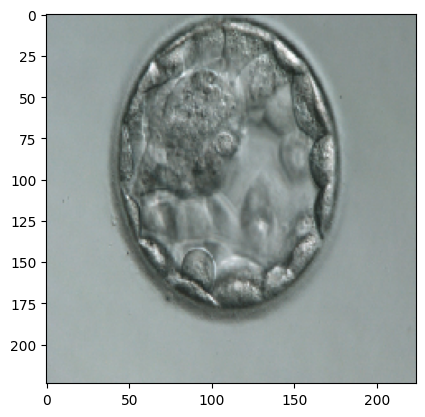

In [6]:
plt.imshow(sample_image);

In [7]:
type(sample_image)

PIL.Image.Image

In [8]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [9]:
type(sample_image)

numpy.ndarray

In [10]:
np.shape(sample_image)

(224, 224, 3)

In [11]:
sample_image = np.expand_dims(sample_image, axis = 0)

In [12]:
sample_image.shape

(1, 224, 224, 3)

In [13]:
sample_image.max() # + próximo de branco

254.0

In [14]:
sample_image.min() # + próximo de preto

30.0

Fazendo a normalização dos pixels da imagem usando o pre processamento da ResNet50

In [15]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [16]:
sample_image.max() # + próximo de branco

150.061

In [17]:
sample_image.min() # + próximo de preto

-93.68

## Fazer a Tranferência de Aprendizado e Reuso do Modelo

In [18]:
base_model =  tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 5s 0us/step


In [19]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

Agora será criada a rede neural Densa, que será personalizada, para juntá-la com essas camadas de convolução e pooling da ResNet 50

In [20]:
x = base_model.output

In [21]:
# Será feito a diminuição da dimensão desta última camada de saída da rede ResNet50 fazedno um pooling com a média dos valores da matriz dos pixels
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [22]:
# Criando as camadas Densas personalizadas
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(8, activation='softmax')(x)

In [23]:
# Criando um modelo que seja a união do modelo pré treinado + as camadas densas personalizadas
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [25]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [26]:
# Como as camadas até a 175 são do modelo que já foi treinado, até a 175 não precisa ser treinada novamente
for layer in model.layers[:175]:
  layer.trainable = False

In [27]:
# serão treinadas as cmadas da 175 em diante, que são as camadas densas personalizadas
for layer in model.layers[175:]:
  layer.trainable = True

In [28]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [29]:
train_generator = train_datagen.flow_from_directory('/content/Base',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 10,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 306 images belonging to 8 classes.


In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit_generator(generator=train_generator,
                              epochs = 100)

Epoch 1/100


<ipython-input-31-38d536ec36c2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


31/31 [==============================] - 15s 90ms/step - loss: 1.9450 - accuracy: 0.3007
Epoch 2/100
31/31 [==============================] - 3s 86ms/step - loss: 1.5520 - accuracy: 0.4379
Epoch 3/100
31/31 [==============================] - 3s 86ms/step - loss: 1.4583 - accuracy: 0.4314
Epoch 4/100
31/31 [==============================] - 3s 85ms/step - loss: 1.3730 - accuracy: 0.5229
Epoch 5/100
31/31 [==============================] - 3s 85ms/step - loss: 1.2415 - accuracy: 0.5523
Epoch 6/100
31/31 [==============================] - 3s 86ms/step - loss: 1.2796 - accuracy: 0.5392
Epoch 7/100
31/31 [==============================] - 3s 86ms/step - loss: 1.1386 - accuracy: 0.5850
Epoch 8/100
31/31 [==============================] - 3s 86ms/step - loss: 1.0958 - accuracy: 0.6111
Epoch 9/100
31/31 [==============================] - 3s 85ms/step - loss: 1.0252 - accuracy: 0.5784
Epoch 10/100
31/31 [==============================] - 3s 85ms/step - loss: 0.9856 - accuracy: 0.6569
Epoch 11/1

## Avaliando o Modelo

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

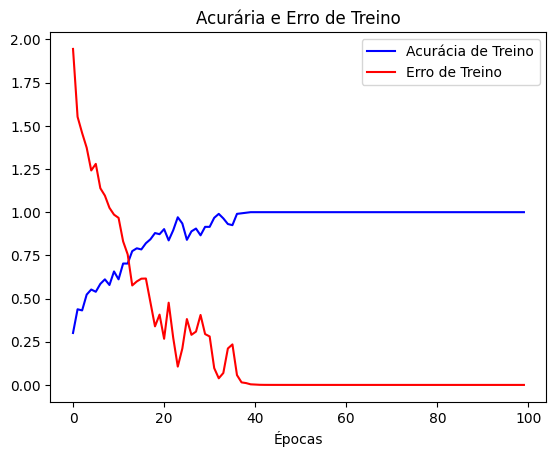

In [33]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, 'b', label='Acurácia de Treino')
plt.plot(loss, 'r', label='Erro de Treino')
plt.xlabel('Épocas')
plt.title('Acurária e Erro de Treino')
plt.legend()

plt.show()

## Testando o novo Modelo

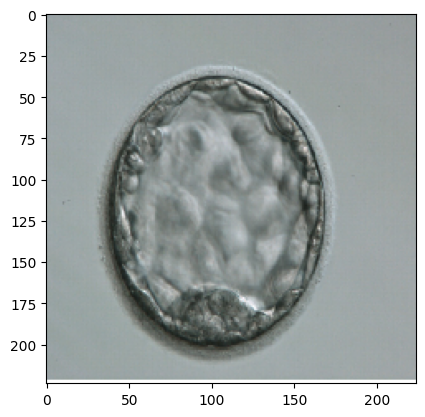

In [41]:
# Embrião 3AA 1.300.PNG
image_test_1 = tf.keras.preprocessing.image.load_img(r'/content/3AA 1.300.PNG', target_size=(224,224))
plt.imshow(image_test_1);

In [42]:
image_test_1 = tf.keras.preprocessing.image.img_to_array(image_test_1)
image_test_1 = np.expand_dims(image_test_1, axis = 0)
image_test_1 = tf.keras.applications.resnet50.preprocess_input(image_test_1)

predictions1 = model.predict(image_test_1)

score_AA = float(predictions1[0][0])
score_AB = float(predictions1[0][1])
score_BA = float(predictions1[0][2])
score_BB = float(predictions1[0][3])
score_BC = float(predictions1[0][4])
score_CA = float(predictions1[0][5])
score_CB = float(predictions1[0][6])
score_CC = float(predictions1[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 25ms/step
 100.00% AA
 0.00% AB
 0.00% BA
 0.00% BB
 0.00% BC
 0.00% CA
 0.00% CB
 0.00% CC.


In [36]:
predictions_1

array([[1.0000000e+00, 5.3028572e-14, 3.5721246e-12, 2.4749744e-13,
        1.0946031e-25, 1.3631056e-21, 2.0885330e-22, 6.6573480e-23]],
      dtype=float32)

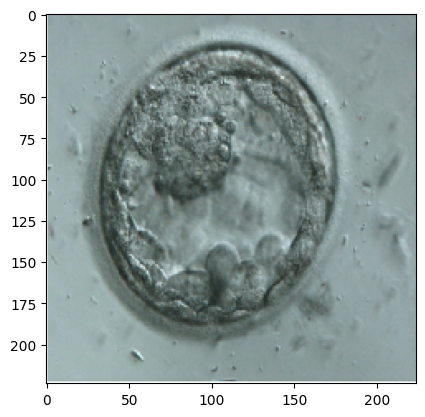

In [43]:
# Embrião 3AB 1.300.PNG
image_test_2 = tf.keras.preprocessing.image.load_img(r'/content/3AB 1.300.PNG', target_size=(224,224))
plt.imshow(image_test_2);

In [44]:
image_test_2 = tf.keras.preprocessing.image.img_to_array(image_test_2)
image_test_2 = np.expand_dims(image_test_2, axis = 0)
image_test_2 = tf.keras.applications.resnet50.preprocess_input(image_test_2)

predictions2 = model.predict(image_test_2)

score_AA = float(predictions2[0][0])
score_AB = float(predictions2[0][1])
score_BA = float(predictions2[0][2])
score_BB = float(predictions2[0][3])
score_BC = float(predictions2[0][4])
score_CA = float(predictions2[0][5])
score_CB = float(predictions2[0][6])
score_CC = float(predictions2[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 26ms/step
 0.00% AA
 100.00% AB
 0.00% BA
 0.00% BB
 0.00% BC
 0.00% CA
 0.00% CB
 0.00% CC.


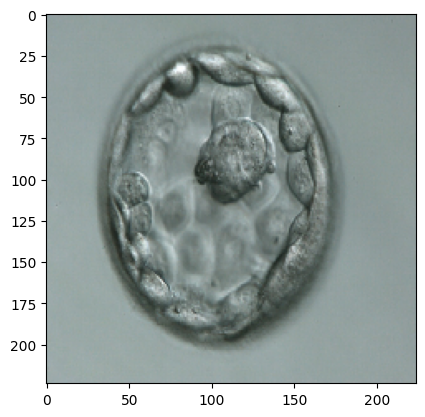

In [45]:
# Embrião 3BA 1.300.PNG
image_test_3 = tf.keras.preprocessing.image.load_img(r'/content/3BA 1.300.PNG', target_size=(224,224))
plt.imshow(image_test_3);

In [46]:
image_test_3 = tf.keras.preprocessing.image.img_to_array(image_test_3)
image_test_3 = np.expand_dims(image_test_3, axis = 0)
image_test_3 = tf.keras.applications.resnet50.preprocess_input(image_test_3)

predictions3 = model.predict(image_test_3)

score_AA = float(predictions3[0][0])
score_AB = float(predictions3[0][1])
score_BA = float(predictions3[0][2])
score_BB = float(predictions3[0][3])
score_BC = float(predictions3[0][4])
score_CA = float(predictions3[0][5])
score_CB = float(predictions3[0][6])
score_CC = float(predictions3[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 26ms/step
 0.00% AA
 0.00% AB
 100.00% BA
 0.00% BB
 0.00% BC
 0.00% CA
 0.00% CB
 0.00% CC.


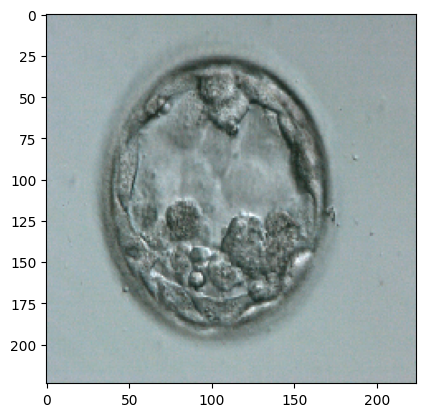

In [47]:
# Embrião 3BB 1.300.PNG
image_test_4 = tf.keras.preprocessing.image.load_img(r'/content/3BB 1.300.PNG', target_size=(224,224))
plt.imshow(image_test_4);

In [48]:
image_test_4 = tf.keras.preprocessing.image.img_to_array(image_test_4)
image_test_4 = np.expand_dims(image_test_4, axis = 0)
image_test_4 = tf.keras.applications.resnet50.preprocess_input(image_test_4)

predictions4 = model.predict(image_test_4)

score_AA = float(predictions4[0][0])
score_AB = float(predictions4[0][1])
score_BA = float(predictions4[0][2])
score_BB = float(predictions4[0][3])
score_BC = float(predictions4[0][4])
score_CA = float(predictions4[0][5])
score_CB = float(predictions4[0][6])
score_CC = float(predictions4[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 25ms/step
 0.00% AA
 0.00% AB
 0.00% BA
 100.00% BB
 0.00% BC
 0.00% CA
 0.00% CB
 0.00% CC.


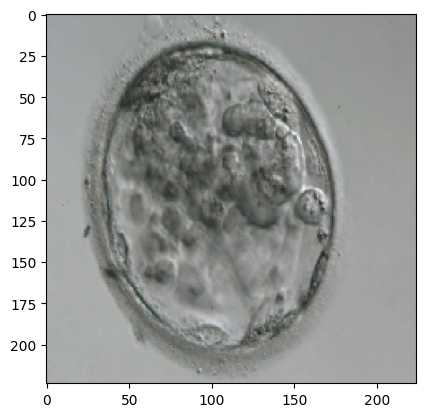

In [49]:
# Embrião 3BC 3.300.PNG
image_test_5 = tf.keras.preprocessing.image.load_img(r'/content/3BC 3.300.PNG', target_size=(224,224))
plt.imshow(image_test_5);

In [50]:
image_test_5 = tf.keras.preprocessing.image.img_to_array(image_test_5)
image_test_5 = np.expand_dims(image_test_5, axis = 0)
image_test_5 = tf.keras.applications.resnet50.preprocess_input(image_test_5)

predictions5 = model.predict(image_test_5)

score_AA = float(predictions5[0][0])
score_AB = float(predictions5[0][1])
score_BA = float(predictions5[0][2])
score_BB = float(predictions5[0][3])
score_BC = float(predictions5[0][4])
score_CA = float(predictions5[0][5])
score_CB = float(predictions5[0][6])
score_CC = float(predictions5[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 25ms/step
 0.00% AA
 0.00% AB
 0.00% BA
 0.00% BB
 100.00% BC
 0.00% CA
 0.00% CB
 0.00% CC.


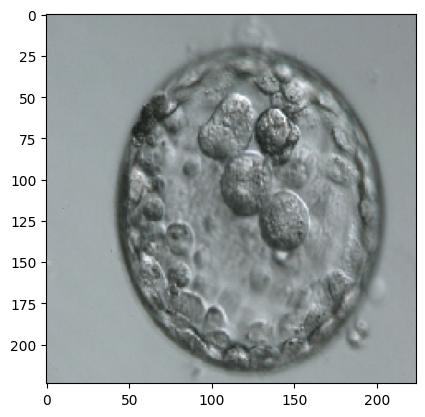

In [51]:
# Embrião 4CA 2.PNG
image_test_6 = tf.keras.preprocessing.image.load_img(r'/content/4CA 2.PNG', target_size=(224,224))
plt.imshow(image_test_6);

In [52]:
image_test_6 = tf.keras.preprocessing.image.img_to_array(image_test_6)
image_test_6 = np.expand_dims(image_test_6, axis = 0)
image_test_6 = tf.keras.applications.resnet50.preprocess_input(image_test_6)

predictions6 = model.predict(image_test_6)

score_AA = float(predictions6[0][0])
score_AB = float(predictions6[0][1])
score_BA = float(predictions6[0][2])
score_BB = float(predictions6[0][3])
score_BC = float(predictions6[0][4])
score_CA = float(predictions6[0][5])
score_CB = float(predictions6[0][6])
score_CC = float(predictions6[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 25ms/step
 0.00% AA
 0.00% AB
 0.00% BA
 0.00% BB
 0.00% BC
 100.00% CA
 0.00% CB
 0.00% CC.


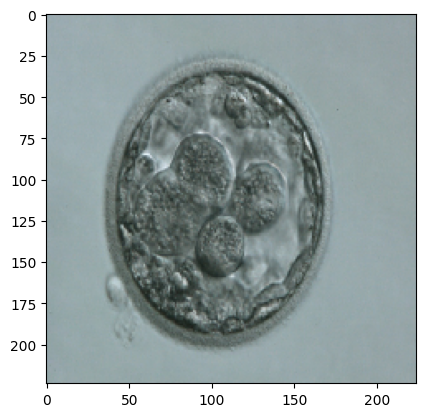

In [53]:
# Embrião 3CB 3.PNG
image_test_7 = tf.keras.preprocessing.image.load_img(r'/content/3CB 3.PNG', target_size=(224,224))
plt.imshow(image_test_7);

In [54]:
image_test_7 = tf.keras.preprocessing.image.img_to_array(image_test_7)
image_test_7 = np.expand_dims(image_test_7, axis = 0)
image_test_7 = tf.keras.applications.resnet50.preprocess_input(image_test_7)

predictions7 = model.predict(image_test_7)

score_AA = float(predictions7[0][0])
score_AB = float(predictions7[0][1])
score_BA = float(predictions7[0][2])
score_BB = float(predictions7[0][3])
score_BC = float(predictions7[0][4])
score_CA = float(predictions7[0][5])
score_CB = float(predictions7[0][6])
score_CC = float(predictions7[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 22ms/step
 0.00% AA
 0.00% AB
 0.00% BA
 0.00% BB
 0.00% BC
 0.00% CA
 100.00% CB
 0.00% CC.


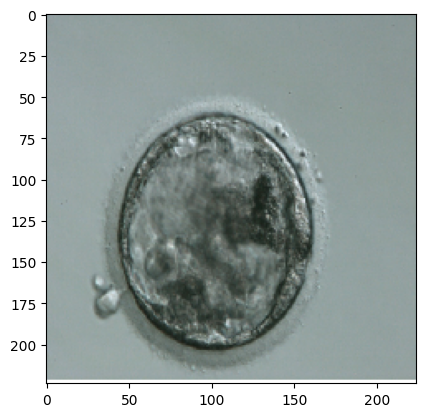

In [55]:
# Embrião 3CC 1.200.PNG
image_test_8 = tf.keras.preprocessing.image.load_img(r'/content/3CC 1.200.PNG', target_size=(224,224))
plt.imshow(image_test_8);

In [56]:
image_test_8 = tf.keras.preprocessing.image.img_to_array(image_test_8)
image_test_8 = np.expand_dims(image_test_8, axis = 0)
image_test_8 = tf.keras.applications.resnet50.preprocess_input(image_test_8)

predictions8 = model.predict(image_test_8)

score_AA = float(predictions8[0][0])
score_AB = float(predictions8[0][1])
score_BA = float(predictions8[0][2])
score_BB = float(predictions8[0][3])
score_BC = float(predictions8[0][4])
score_CA = float(predictions8[0][5])
score_CB = float(predictions8[0][6])
score_CC = float(predictions8[0][7])

print(f" {100 * score_AA:.2f}% AA\n {100 * score_AB:.2f}% AB\n {100 * score_BA:.2f}% BA\n {100 * score_BB:.2f}% BB\n {100 * score_BC:.2f}% BC\n {100 * score_CA:.2f}% CA\n {100 * score_CB:.2f}% CB\n {100 * score_CC:.2f}% CC.")

1/1 [==============================] - 0s 24ms/step
 0.00% AA
 0.00% AB
 0.00% BA
 0.00% BB
 0.00% BC
 0.00% CA
 0.00% CB
 100.00% CC.


## Em Resumo...

Imagem 3AA 1.300:

* 100.00% AA
* 0.00% AB
* 0.00% BA
* 0.00% BB
* 0.00% BC
* 0.00% CA
* 0.00% CB
* 0.00% CC

Imagem 3AB 1.300:

* 0.00% AA
* 100.00% AB
* 0.00% BA
* 0.00% BB
* 0.00% BC
* 0.00% CA
* 0.00% CB
* 0.00% CC

Imagem 3BA 1.300:

* 0.00% AA
* 0.00% AB
* 100.00% BA
* 0.00% BB
* 0.00% BC
* 0.00% CA
* 0.00% CB
* 0.00% CC

Imagem 3BC 3.300:

* 0.00% AA
* 0.00% AB
* 0.00% BA
* 0.00% BB
* 100.00% BC
* 0.00% CA
* 0.00% CB
* 0.00% CC

Imagem 3BB 1.300:

* 0.00% AA
* 0.00% AB
* 0.00% BA
* 100.00% BB
* 0.00% BC
* 0.00% CA
* 0.00% CB
* 0.00% CC

Imagem 4CA 2:

* 0.00% AA
* 0.00% AB
* 0.00% BA
* 0.00% BB
* 0.00% BC
* 100.00% CA
* 0.00% CB
* 0.00% CC

Imagem 3CB 3:

* 0.00% AA
* 0.00% AB
* 0.00% BA
* 0.00% BB
* 0.00% BC
* 0.00% CA
* 100.00% CB
* 0.00% CC

Imagem 3CC 1.200:

* 0.00% AA
* 0.00% AB
* 0.00% BA
* 0.00% BB
* 0.00% BC
* 0.00% CA
* 0.00% CB
* 100.00% CC